In [201]:
# lib
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from math import sqrt

In [202]:
class SLR():

    def __init__(self):
        '''
        Class constructor
        '''
        self.PATH_TO_DATASET = 'dataset/flats_moscow.csv'  # path to dataset
        self._dataset= pd.DataFrame()  # data frame of dataset
        self._solv = pd.DataFrame(columns=['Sum of real Y', 'Sum of predict Y', 'B1', 'B2', 'Sum of E', 'R'])


    def StoringDataSet(self):
        '''
        
        Private method for storing dataset from csv to DataFrame and choosing only important data(price and area)

        '''
        path = Path(self.PATH_TO_DATASET)
        
        if not path.is_file():  # check is file with dataset exist
            raise Exception(f'Error! File with dataset on path {self.PATH_TO_DATASET} is not exist')
        
        self._dataset= pd.read_csv(self.PATH_TO_DATASET)  # store dataset to dataframe
        
        if self._dataset.empty:  # check is dataframe not empty
            raise Exception(f'Waring! Data set on path {self.PATH_TO_DATASET} is empty. Counting is aborted.')
        
        self._is_stored_dataset = True


    def _Check_dataset(self)->bool:

        if self._dataset.empty:
            return False

        return True

    def _Get_dataset(self, linear:bool, positive:bool):
        return self._dataset

    def _Sampling(self, data:pd.DataFrame, full_dataset:bool, random_sampling:bool, sampl_cnt:int):
        
        sample = data.loc[:, ['price', 'totsp']]
        
        if random_sampling:
            cnt_samples = np.random(20, 100)
        else:
            cnt_samples = sampl_cnt
        
        if not full_dataset:
            low_x, high_x, low_y, high_y = sample['totsp'].mode()[0]-20, sample['totsp'].mode()[0]+20, sample['price'].mode()[0]-5, sample['price'].mode()[0]+5
            sample = sample[(sample['totsp'] >= low_x) & (sample['totsp'] <= high_x) & (sample['price'] >= low_y) & (sample['price'] <= high_y)].sample(n=cnt_samples)
        
        return sample['totsp'].values, sample['price'].values

    def _Vizualization(self, x:np.array, y:np.array, y_predict:np.array):
        
        plt.scatter(x, y, marker='o', color='blue')
        plt.axis([x.min()-10, x.max()+10, y.min()-10, y.max()+10])  # xmin, xmax, ymin, ymax
        
        plt.plot(x, y_predict, color='red')
        plt.xlabel('area ( m^2)')
        plt.ylabel('cost (1000 $)')
        
        plt.gca().ticklabel_format(useOffset=False)
        plt.title('Area to cost')
        plt.show()

        
    def _Alg(self, x:np.array, y:np.array):
        
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        
        b2 = np.sum(np.multiply((x - x_mean), (y - y_mean)))/np.sum(np.power((x - x_mean), 2))
        b1 = y_mean - b2*x_mean

        y_predict = b1 + b2*x

        e = y - y_predict  # positive (up), negative (down)

        e_sum = np.sum(e)
        y_sum = np.sum(y)
        y_predict_sum = np.sum(y_predict)

        r = (np.mean(np.multiply(x, y)) - np.mean(x)*np.mean(y))/sqrt((np.mean(np.power(x,2))-np.mean(x)**2)*(np.mean(np.power(y,2))-np.mean(y)**2))

        return y_predict, y_sum, y_predict_sum, b1, b2, e_sum, r
        

    def Experiment(self, count:int, full_dataset:bool, random_sampling:bool, lineare:bool, positive:bool, cnt_sample:int)->None:
        
        '''
        
        Main method for counting SLR algorithms

        '''

        
        #for i in range(50):
        if count < 0:
            raise Exception('Warning! The range of the number of elements must be greater than zero.')

        if not self._Check_dataset():
            raise Exception('Warning! You have empty datasets. Please store a data')
        
        for _ in range(count):

            x, y = self._Sampling(self._Get_dataset(lineare, positive), full_dataset, random_sampling, cnt_sample)
            
            y_predict, y_sum, y_predict_sum, b1, b2, e_sum, r = self._Alg(x, y)
            
            self._solv.loc[len(self._solv)] = {'Sum of real Y':y_sum, 'Sum of predict Y':y_predict_sum, 'B1': b1, 'B2': b2, 'Sum of E':e_sum, 'R': r}
            
            if count == 1:
                self._Vizualization(x, y, y_predict)


        print(self._solv['R'])

    

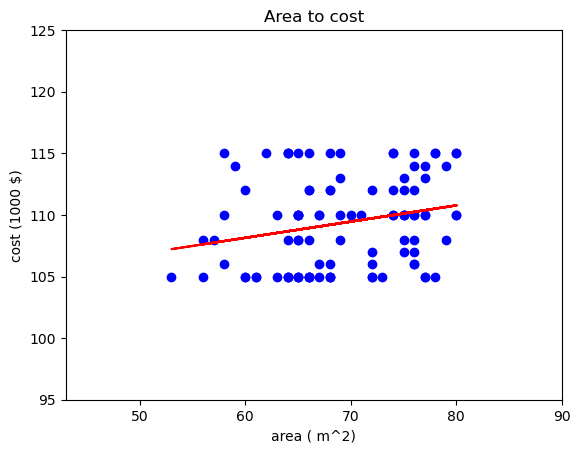

0    0.23763
Name: R, dtype: float64


In [203]:
SLR_solv = SLR()
SLR_solv.StoringDataSet()
SLR_solv.Experiment(count=1, full_dataset=False, random_sampling=False, lineare=False, positive=False, cnt_sample=100)